In [63]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'                 'machine-learning-databases'                 '/breast-cancer-wisconsin/wdbc.data',                 header=None)

X = df.loc[:,2:].values
y = df.loc[:,1]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size =0.2, stratify =y, random_state =1)
print(X_train.shape)
print(y_train.shape)


(455, 30)
(455,)


# Bias and Varianve with learning Curves

###### Learning Curve from sklearn learning_curve

In [64]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np

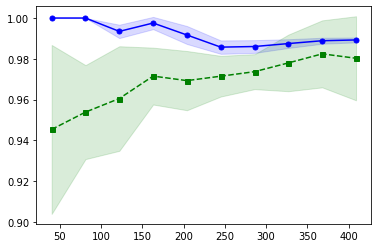

In [65]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=1))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,  X=X_train,y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')

In [66]:
# Over and Under fitting iwth Validation Curve

In [67]:
from sklearn.model_selection import validation_curve
pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [69]:
from sklearn.model_selection import validation_curve

In [70]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

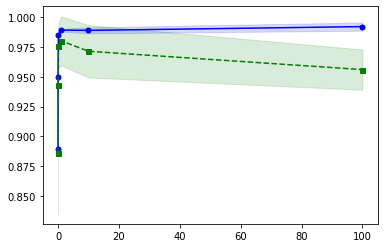

In [75]:
train_scores, test_scores = validation_curve(estimator=pipe_lr,X=X_train,y=y_train,param_name='logisticregression__C',param_range=param_range,cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,color='blue', marker='o',markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15,color='blue')

plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')

plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')